# Table of Contents
 <p><div class="lev1"><a href="#Matplotlib"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matplotlib</a></div><div class="lev2"><a href="#Hist2d"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Hist2d</a></div><div class="lev2"><a href="#Hexbin"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Hexbin</a></div><div class="lev1"><a href="#Seaborn"><span class="toc-item-num">2&nbsp;&nbsp;</span>Seaborn</a></div><div class="lev2"><a href="#Faceting"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Faceting</a></div><div class="lev3"><a href="#Temporal"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Temporal</a></div><div class="lev3"><a href="#By-Category"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>By Category</a></div><div class="lev2"><a href="#Distribution-Plots"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution Plots</a></div><div class="lev3"><a href="#KDE-Plot"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>KDE Plot</a></div><div class="lev3"><a href="#Joint-Plot"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Joint Plot</a></div><div class="lev3"><a href="#Heatmap"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Heatmap</a></div>

Let's run the same operation is previously

In [ ]:
%load load_and_enrich.py

In [1]:
#let's get rid of the outliers
train = train[train.Y < 40]

CPU times: user 3.52 s, sys: 241 ms, total: 3.76 s
Wall time: 5.14 s
CPU times: user 89.6 ms, sys: 4.67 ms, total: 94.3 ms
Wall time: 94.4 ms
CPU times: user 103 ms, sys: 11.6 ms, total: 114 ms
Wall time: 118 ms
CPU times: user 105 ms, sys: 14.7 ms, total: 120 ms
Wall time: 124 ms
CPU times: user 137 ms, sys: 16.8 ms, total: 154 ms
Wall time: 154 ms
CPU times: user 104 ms, sys: 13.2 ms, total: 117 ms
Wall time: 119 ms


# Matplotlib

## Hist2d

CPU times: user 499 ms, sys: 92.3 ms, total: 592 ms
Wall time: 592 ms


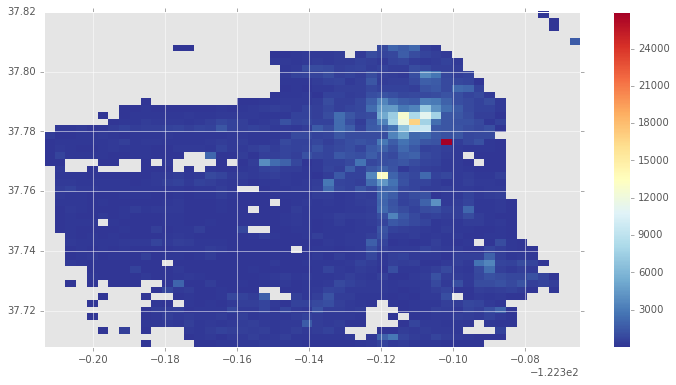

In [2]:
plt.figure(figsize=(12,6))
%time plt.hist2d(train.X,train.Y,bins=50,cmin=10,cmap=cm.RdYlBu_r);
plt.colorbar()
plt.show()

## Hexbin

CPU times: user 2.25 s, sys: 61.5 ms, total: 2.31 s
Wall time: 2.31 s


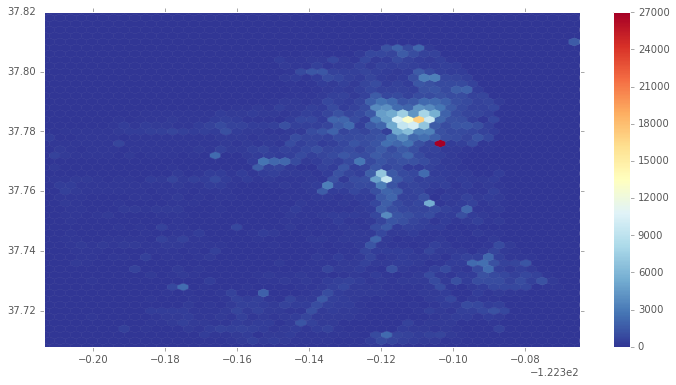

In [3]:
plt.figure(figsize=(12,6))
%time plt.hexbin(train.X,train.Y,gridsize=50,bins=None,cmap=cm.RdYlBu_r)
plt.axis([train.X.min(), train.X.max(), train.Y.min(), train.Y.max()])
cb = plt.colorbar()
plt.show()

Most of the crimes are happening in a some hotspots in the top right.  
In order to have a better idea of difference in magnitude between the blocks, let's apply a **log** scale for the colors.

CPU times: user 2.29 s, sys: 47.1 ms, total: 2.34 s
Wall time: 2.34 s


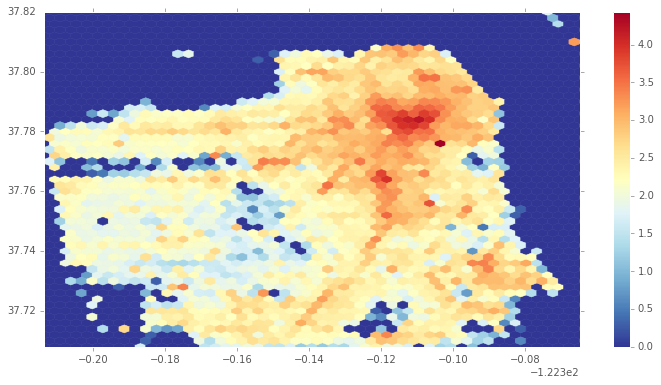

In [4]:
plt.figure(figsize=(12,6))
%time plt.hexbin(x=train.X,y=train.Y,gridsize=50,bins='log',cmap=cm.RdYlBu_r)
plt.axis([train.X.min(), train.X.max(), train.Y.min(), train.Y.max()])
cb = plt.colorbar()
plt.show()

# Seaborn

In [5]:
import seaborn as sns

## Faceting

### Temporal

Let's draw a hexbin plot per **Year**

CPU times: user 8.27 s, sys: 353 ms, total: 8.62 s
Wall time: 8.76 s


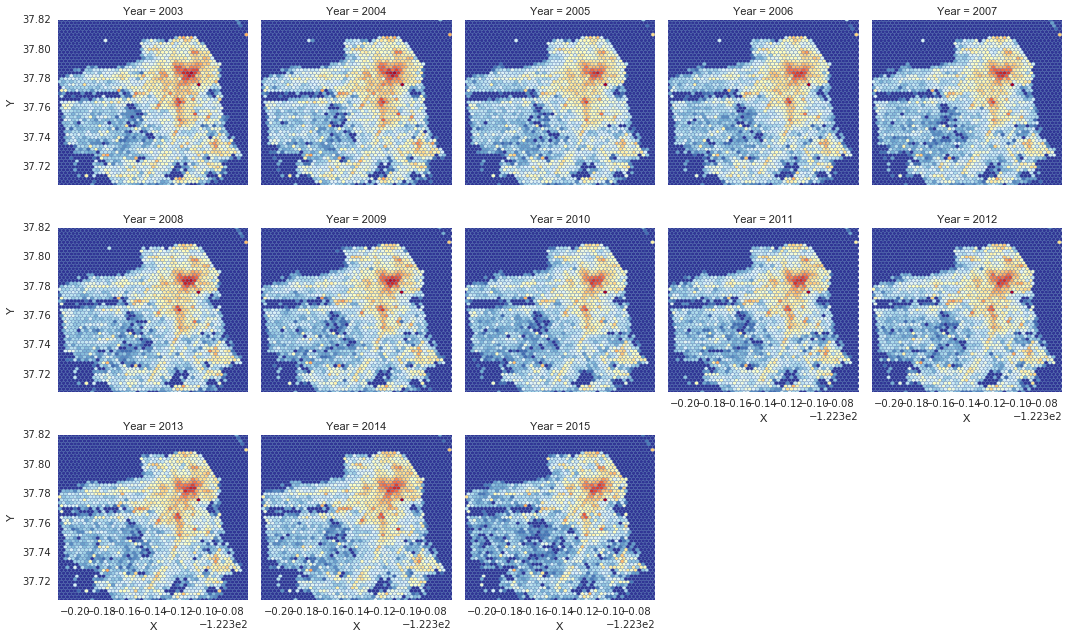

In [6]:
g = sns.FacetGrid(train, col='Year',col_wrap=5)
%time g.map(plt.hexbin,'X','Y',gridsize=50,bins='log',cmap=cm.RdYlBu_r);
plt.show()

and now by **Month**

CPU times: user 8.25 s, sys: 331 ms, total: 8.58 s
Wall time: 8.59 s


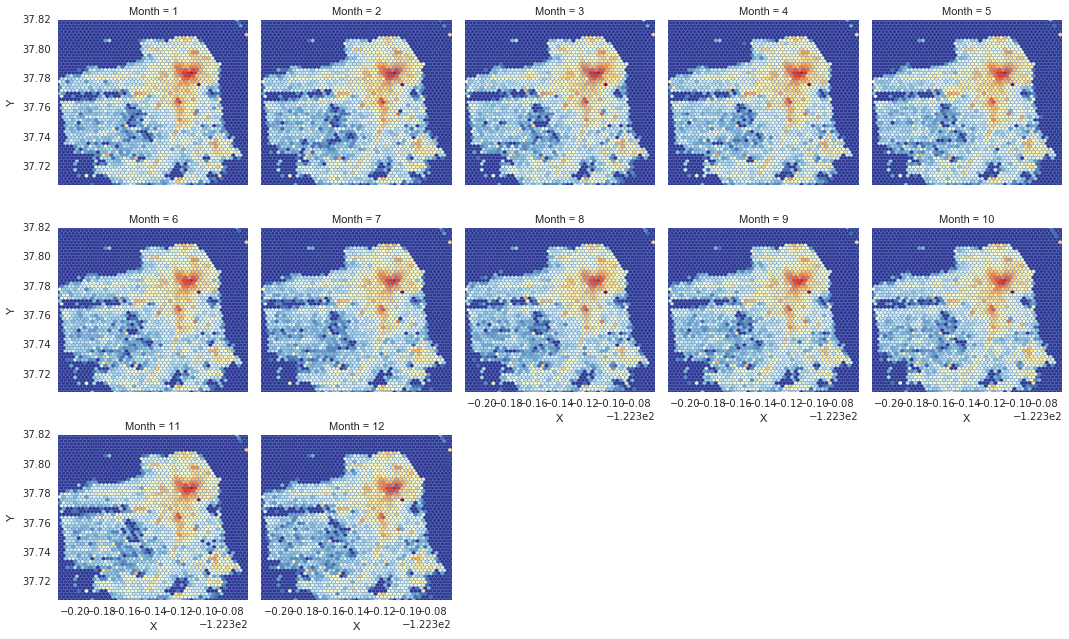

In [7]:
g = sns.FacetGrid(train, col='Month',col_wrap=5)
%time g.map(plt.hexbin,'X','Y',gridsize=50,bins='log',cmap=cm.RdYlBu_r);
plt.show()

And by **DayOfWeek**

CPU times: user 8.1 s, sys: 303 ms, total: 8.4 s
Wall time: 8.41 s


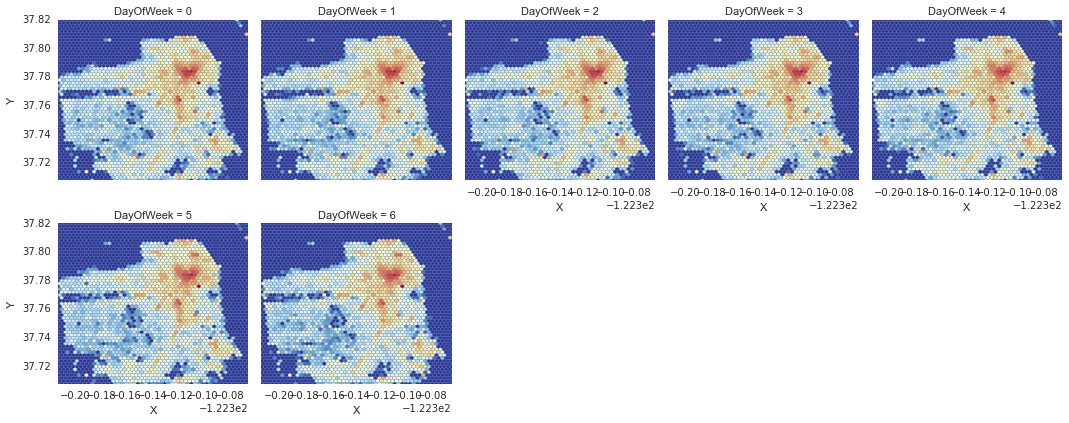

In [8]:
g = sns.FacetGrid(train, col='DayOfWeek',col_wrap=5)
%time g.map(plt.hexbin,'X','Y',gridsize=50,bins='log',cmap=cm.RdYlBu_r);
plt.show()

It seems like the ***Temporal*** and ***Spacial*** Axis are not that correlated.  
At least when we don't break down the crimes by **Category** 

### By Category

Let's do the same analysis on all categories

CPU times: user 11.6 s, sys: 375 ms, total: 11.9 s
Wall time: 12 s


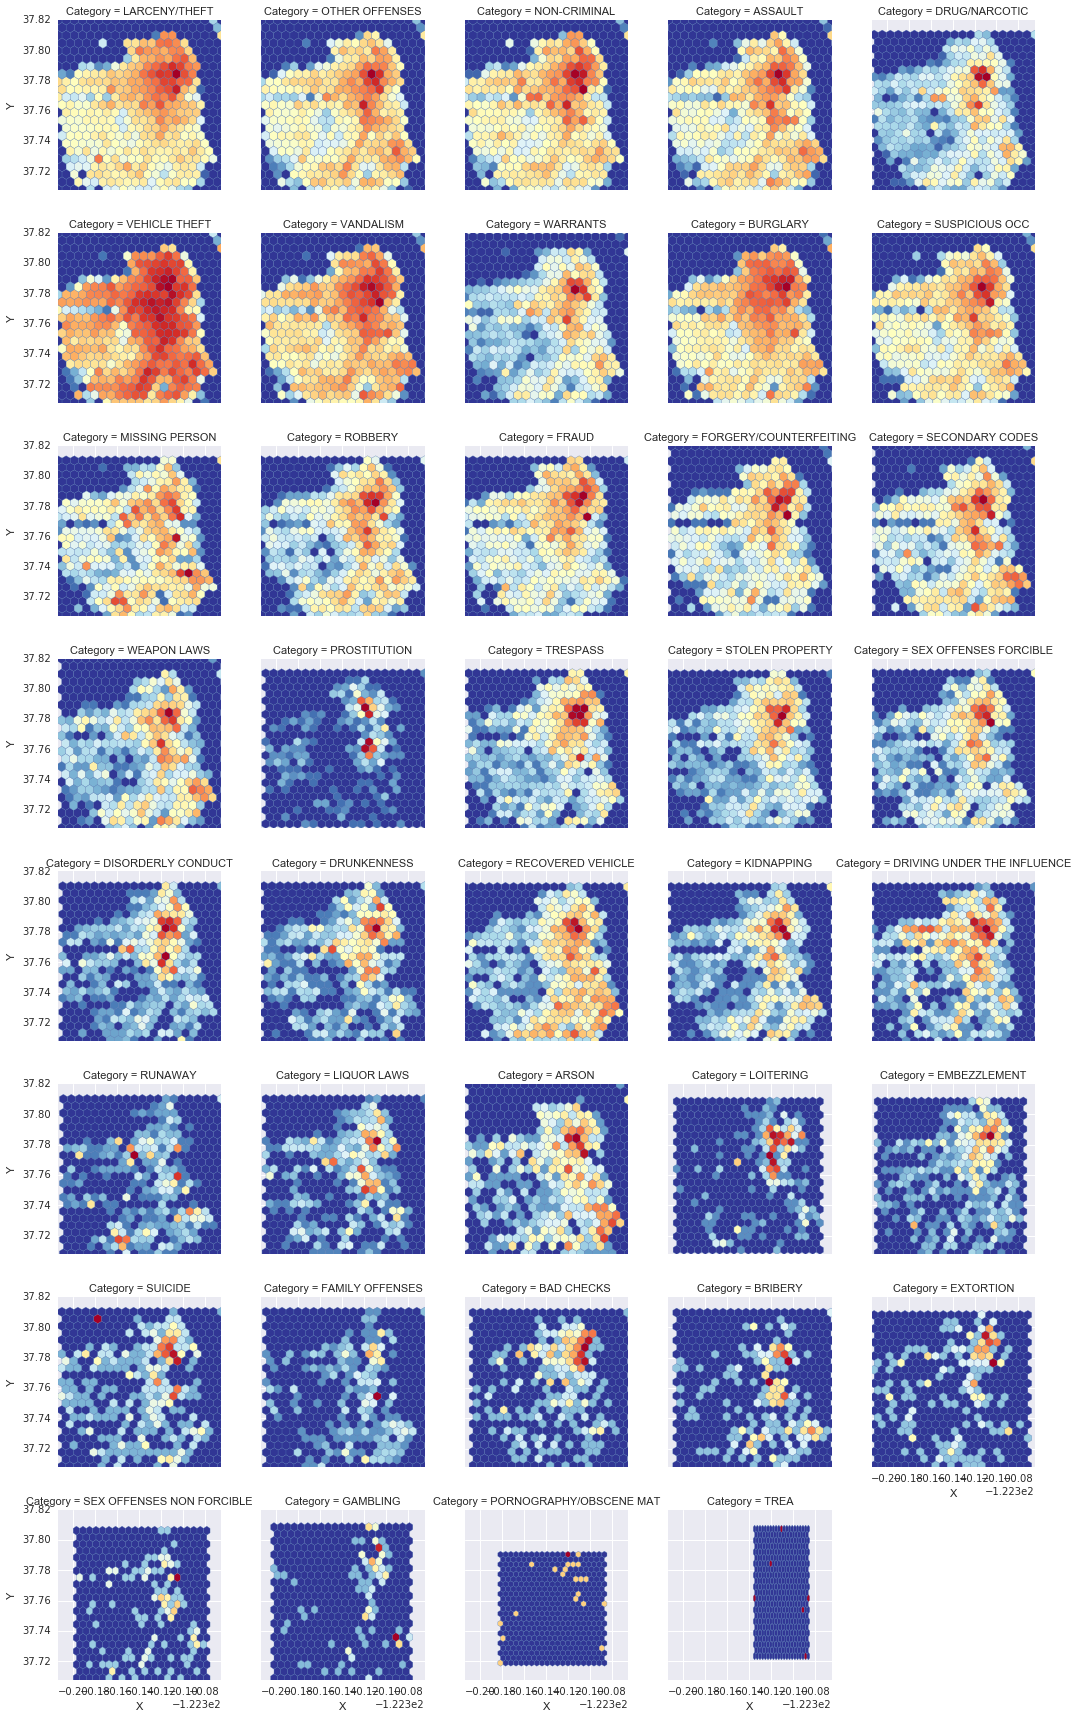

In [9]:
orderedCategories = train.Category.value_counts().index

g = sns.FacetGrid(train, col='Category',col_wrap=5, col_order=orderedCategories)
%time g.map(plt.hexbin,'X','Y',gridsize=20,bins='log',cmap=cm.RdYlBu_r);
plt.show()

CPU times: user 123 ms, sys: 11.5 ms, total: 134 ms
Wall time: 132 ms
CPU times: user 3.46 s, sys: 44.4 ms, total: 3.51 s
Wall time: 3.51 s


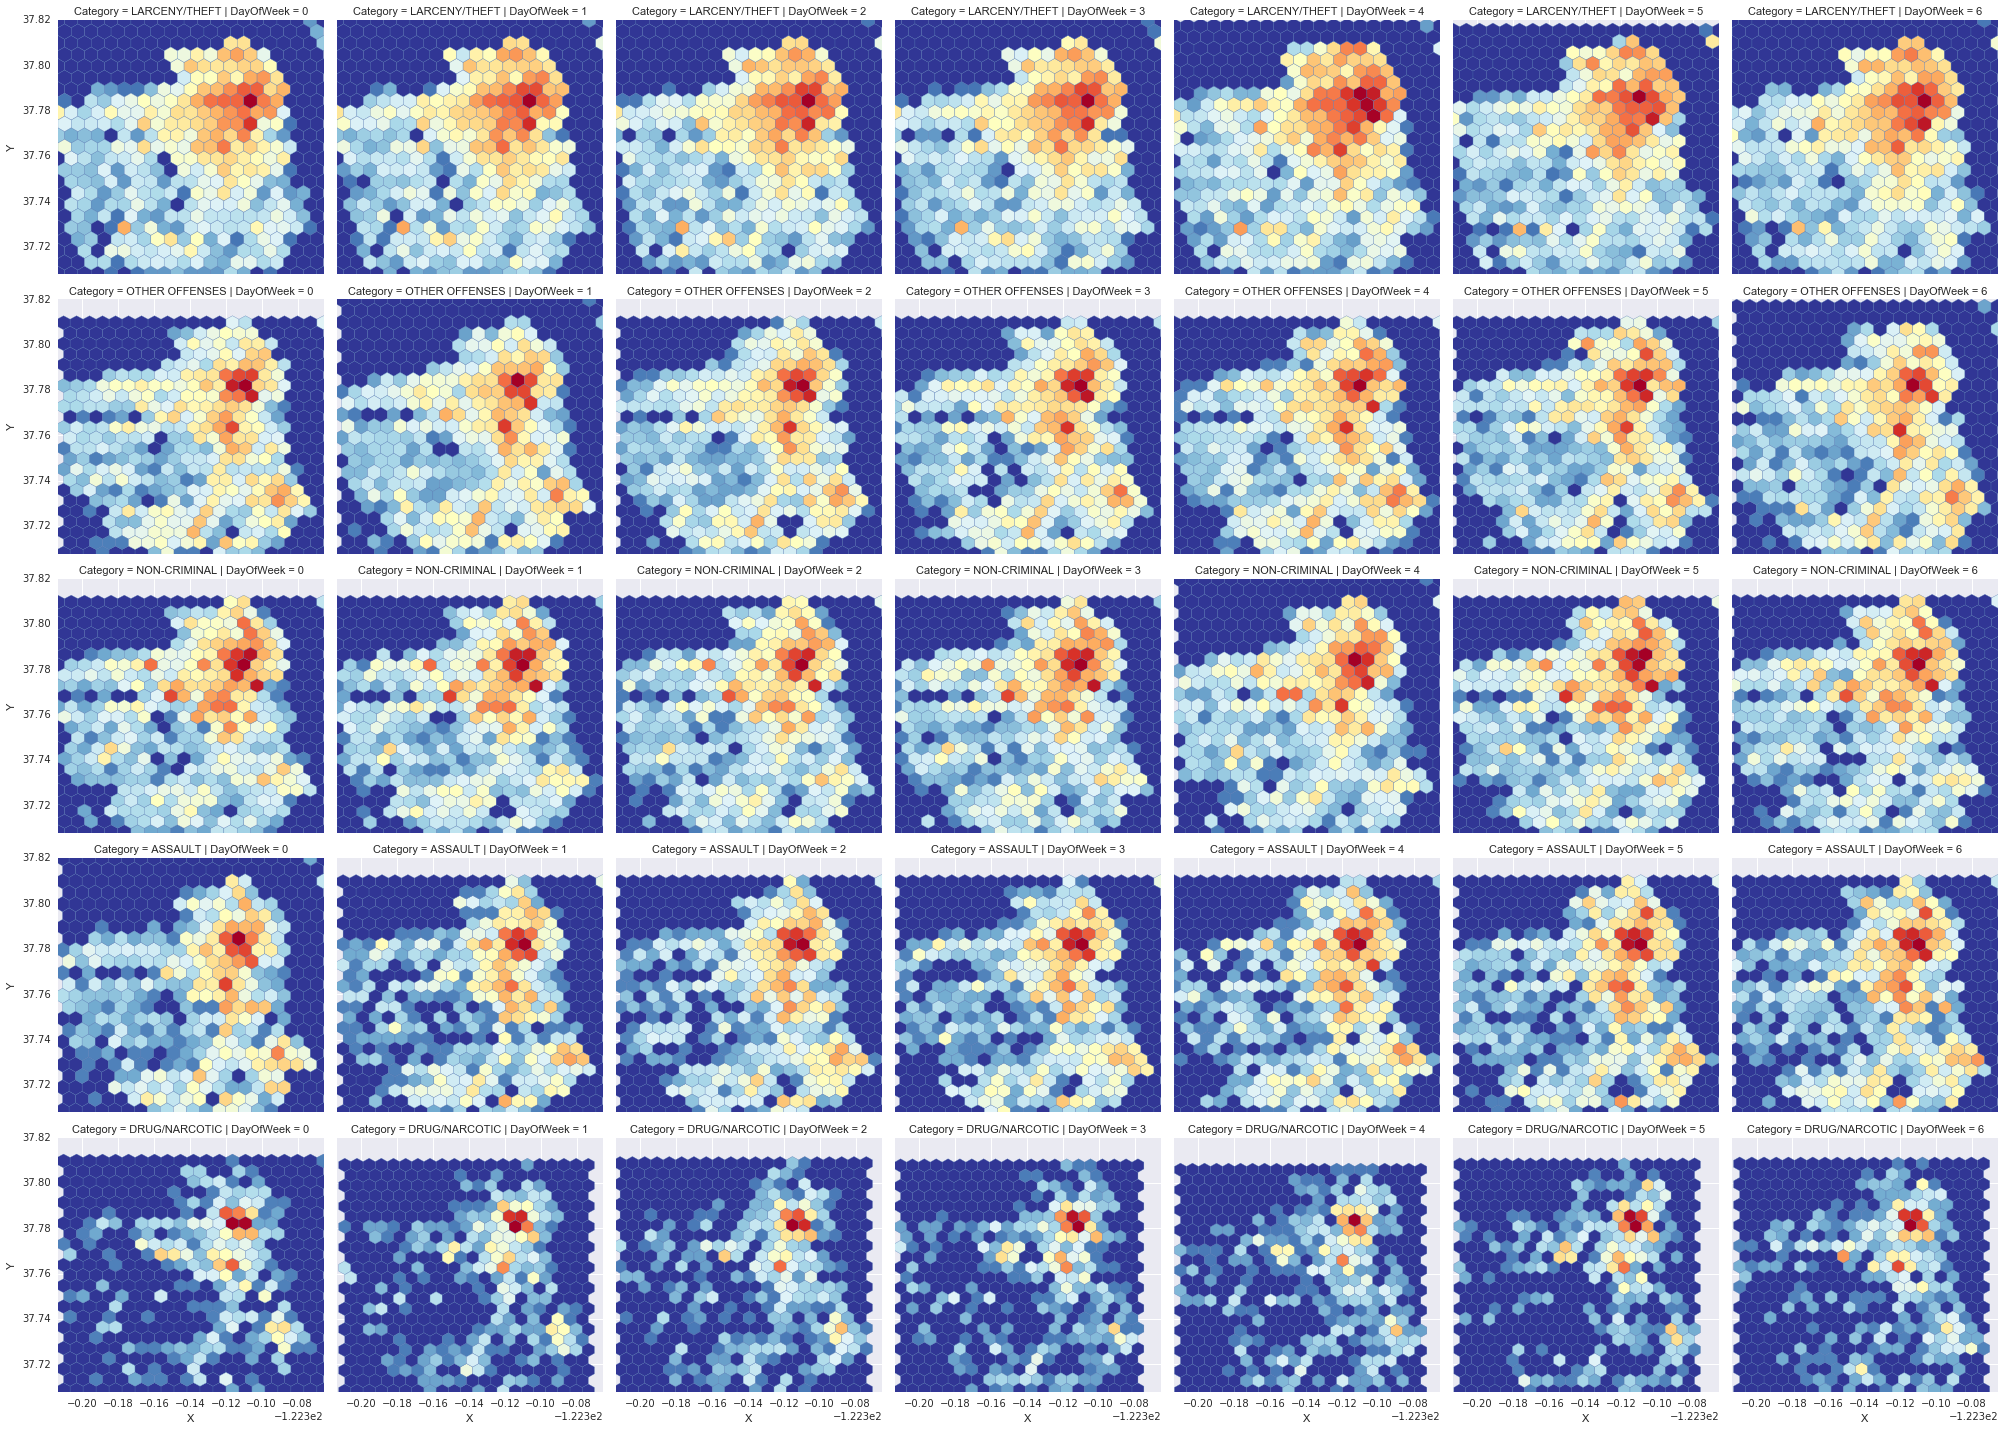

In [10]:
topCategories = orderedCategories[:5]
%time filtered = train[(train.Year > 2010) & (train.Category.isin(topCategories))] 
g = sns.FacetGrid(filtered, row='Category', col='DayOfWeek',row_order=topCategories,size=4,aspect=1)
%time g.map(plt.hexbin,'X','Y',gridsize=20,bins='log',cmap=cm.RdYlBu_r);
plt.show()

## Distribution Plots

### KDE Plot

**1D**

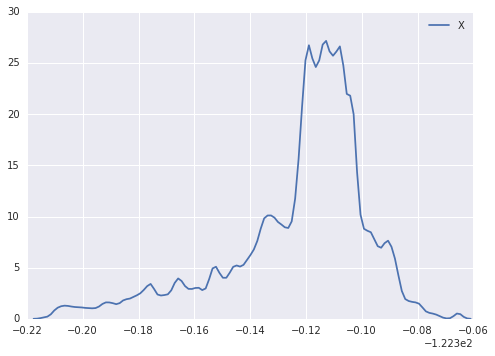

In [11]:
sns.kdeplot(train.X);pass

**2D**

CPU times: user 17.5 s, sys: 4.08 s, total: 21.6 s
Wall time: 21.6 s


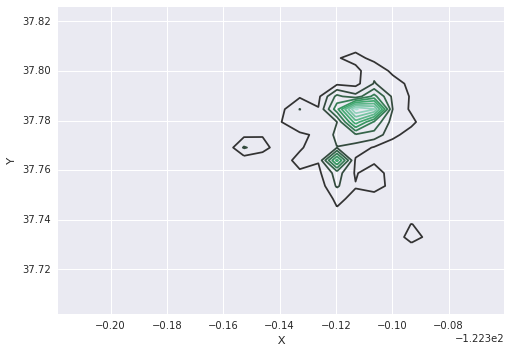

In [12]:
filtered = train[train.Year > 2010]
%time sns.kdeplot(filtered.X, filtered.Y, gridsize=25,size=10);pass

CPU times: user 17.4 s, sys: 4.11 s, total: 21.5 s
Wall time: 21.6 s


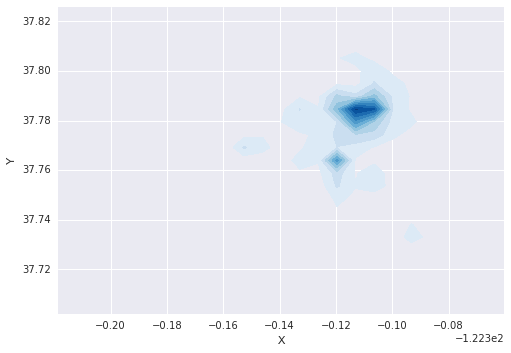

In [14]:
filtered = train[train.Year > 2010]
%time sns.kdeplot(filtered.X, filtered.Y, gridsize=25,shade=True,shade_lowest=False,cmap=cm.Blues,size=10);pass

### Joint Plot

CPU times: user 3.42 s, sys: 106 ms, total: 3.53 s
Wall time: 3.56 s


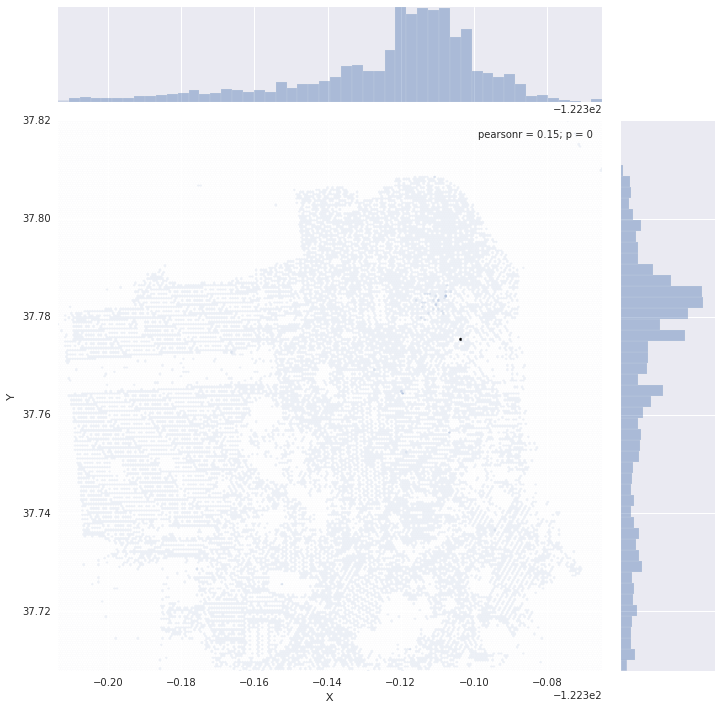

In [15]:
%time sns.jointplot("X", "Y", data=train, bins=20, kind="hex",size=10);pass

CPU times: user 412 ms, sys: 14.9 ms, total: 427 ms
Wall time: 428 ms
CPU times: user 24.9 s, sys: 5.94 s, total: 30.9 s
Wall time: 30.9 s


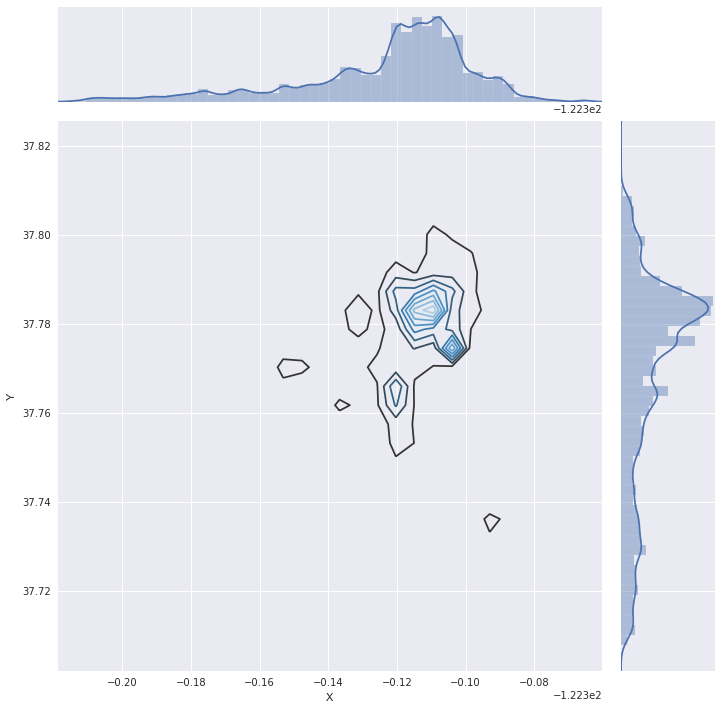

In [16]:
g = sns.JointGrid(x="X", y="Y", data=filtered, size=10)
%time g.plot_marginals(sns.distplot)
%time g.plot_joint(sns.kdeplot,cmap='Blues_d', gridsize=30);pass

### Heatmap

In [17]:
yearly = train.pivot_table(index='Year',columns=['Month'],values='Category',aggfunc=np.count_nonzero)
yearly.loc[2015,5]=np.nan
yearly

Month      1       2       3       4       5       6       7       8       9   \
Year                                                                            
2003   5831.0  5963.0  6099.0  6757.0  7024.0  6045.0  5502.0  5798.0  6703.0   
2004   5937.0  5626.0  7259.0  6987.0  6862.0  5611.0  5679.0  6435.0  6361.0   
2005   5668.0  5251.0  5448.0  5585.0  6426.0  6134.0  6511.0  5421.0  5423.0   
2006   5896.0  5537.0  5418.0  5524.0  6177.0  6393.0  6246.0  5523.0  5312.0   
2007   5094.0  5093.0  5209.0  5336.0  6253.0  5984.0  5894.0  5331.0  5509.0   
2008   5182.0  5284.0  5974.0  6028.0  6597.0  5556.0  5631.0  5275.0  6367.0   
2009   5272.0  5237.0  6580.0  6472.0  6355.0  4543.0  4960.0  6199.0  6671.0   
2010   5179.0  5063.0  4997.0  4890.0  5708.0  5888.0  6207.0  5758.0  5453.0   
2011   6130.0  5029.0  5071.0  5123.0  5742.0  5915.0  5895.0  5056.0  5278.0   
2012   5987.0  5367.0  5341.0  5618.0  6563.0  6024.0  5692.0  5481.0  5585.0   
2013   5712.0  5694.0  5830.0  6615.0  6924.0  6797.0  5944.0  6103.0  6649.0   
2014   5780.0  5659.0  6240.0  6549.0  6759.0  5992.0  5808.0  6147.0  6667.0   
2015   5866.0  6008.0  6851.0  6609.0     NaN     NaN     NaN     NaN     NaN   

Month      10      11      12  
Year                           
2003   7259.0  6194.0  4713.0  
2004   6695.0  5011.0  4944.0  
2005   6276.0  6418.0  6180.0  
2006   6183.0  5868.0  5832.0  
2007   6733.0  6253.0  5326.0  
2008   7173.0  6371.0  4736.0  
2009   6593.0  5581.0  4537.0  
2010   5395.0  5906.0  6098.0  
2011   5410.0  5761.0  6209.0  
2012   7497.0  6584.0  5992.0  
2013   7741.0  6553.0  5044.0  
2014   7303.0  6471.0  5391.0  
2015      NaN     NaN     NaN

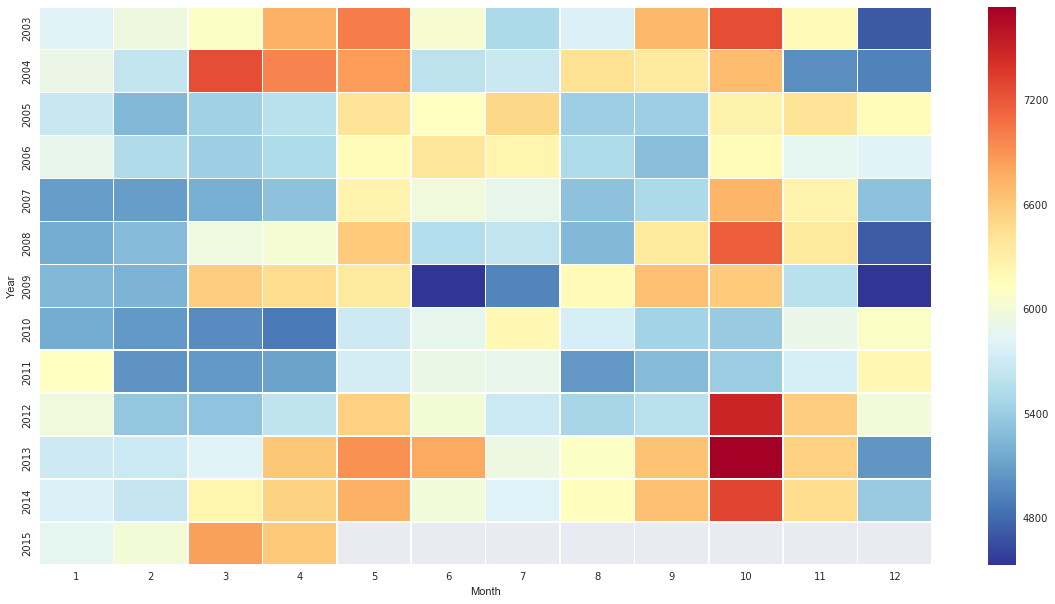

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(yearly, linewidths=.5,cmap=cm.RdYlBu_r)
plt.show()

In [19]:
cats = train.pivot_table(index='Category',columns=['DayOfWeek'],values='Year',aggfunc=np.count_nonzero)
# sort categories by occurence
cats = cats.loc[orderedCategories] 
cats

DayOfWeek                          0        1        2        3        4  \
LARCENY/THEFT                23568.0  23955.0  24484.0  24415.0  27102.0   
OTHER OFFENSES               17783.0  18806.0  19946.0  18459.0  18587.0   
NON-CRIMINAL                 12854.0  12738.0  12928.0  12818.0  13983.0   
ASSAULT                      10559.0  10280.0  10553.0  10246.0  11157.0   
DRUG/NARCOTIC                 7823.0   8474.0   9267.0   8454.0   7420.0   
VEHICLE THEFT                 7412.0   7261.0   7412.0   7454.0   8612.0   
VANDALISM                     5945.0   5852.0   5927.0   5980.0   7092.0   
WARRANTS                      5811.0   6425.0   7028.0   6372.0   5926.0   
BURGLARY                      5262.0   5374.0   5457.0   5350.0   6326.0   
SUSPICIOUS OCC                4447.0   4516.0   4851.0   4510.0   4923.0   
MISSING PERSON                3592.0   3655.0   3586.0   3680.0   4663.0   
ROBBERY                       3193.0   3221.0   3273.0   3216.0   3384.0   
FRAUD                         2533.0   2506.0   2518.0   2351.0   2641.0   
FORGERY/COUNTERFEITING        1704.0   1752.0   1707.0   1610.0   1757.0   
SECONDARY CODES               1483.0   1343.0   1373.0   1389.0   1392.0   
WEAPON LAWS                   1183.0   1176.0   1252.0   1282.0   1302.0   
PROSTITUTION                   409.0   1421.0   1479.0   1547.0   1158.0   
TRESPASS                      1080.0   1114.0   1122.0   1047.0   1064.0   
STOLEN PROPERTY                636.0    713.0    700.0    679.0    647.0   
SEX OFFENSES FORCIBLE          607.0    597.0    626.0    585.0    620.0   
DISORDERLY CONDUCT             608.0    657.0    659.0    643.0    541.0   
DRUNKENNESS                    513.0    461.0    542.0    496.0    622.0   
RECOVERED VEHICLE              530.0    517.0    515.0    432.0    494.0   
KIDNAPPING                     340.0    306.0    292.0    289.0    385.0   
DRIVING UNDER THE INFLUENCE    263.0    251.0    221.0    282.0    352.0   
RUNAWAY                        280.0    275.0    269.0    305.0    344.0   
LIQUOR LAWS                    188.0    323.0    334.0    248.0    291.0   
ARSON                          228.0    235.0    200.0    199.0    220.0   
LOITERING                      193.0    252.0    160.0    186.0    139.0   
EMBEZZLEMENT                   222.0    156.0    167.0    165.0    211.0   
SUICIDE                         75.0     66.0     66.0     89.0     72.0   
FAMILY OFFENSES                 69.0     85.0     79.0     63.0     82.0   
BAD CHECKS                      66.0     76.0     71.0     66.0     62.0   
BRIBERY                         41.0     37.0     40.0     39.0     49.0   
EXTORTION                       30.0     39.0     41.0     40.0     35.0   
SEX OFFENSES NON FORCIBLE       23.0     23.0     22.0     15.0     28.0   
GAMBLING                        16.0     12.0     30.0     20.0     35.0   
PORNOGRAPHY/OBSCENE MAT          3.0      3.0      3.0      5.0      4.0   
TREA                             1.0      1.0      NaN      1.0      1.0   

DayOfWeek                          5        6  
LARCENY/THEFT                27214.0  24147.0  
OTHER OFFENSES               17128.0  15456.0  
NON-CRIMINAL                 14007.0  12972.0  
ASSAULT                      11995.0  12082.0  
DRUG/NARCOTIC                 6390.0   6143.0  
VEHICLE THEFT                 8117.0   7504.0  
VANDALISM                     7326.0   6602.0  
WARRANTS                      5364.0   5280.0  
BURGLARY                      4754.0   4231.0  
SUSPICIOUS OCC                4155.0   4010.0  
MISSING PERSON                3752.0   3061.0  
ROBBERY                       3428.0   3284.0  
FRAUD                         2256.0   1874.0  
FORGERY/COUNTERFEITING        1178.0    901.0  
SECONDARY CODES               1462.0   1543.0  
WEAPON LAWS                   1232.0   1128.0  
PROSTITUTION                   850.0    620.0  
TRESPASS                       983.0    915.0  
STOLEN PROPERTY                581.0    583.0  

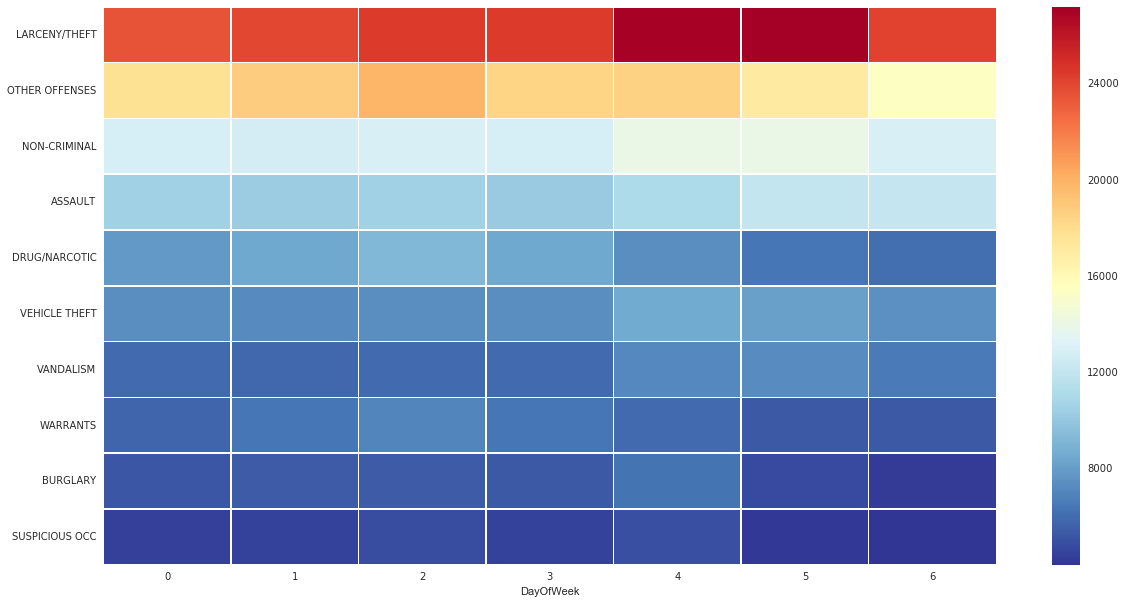

In [20]:
plt.figure(figsize=(20,10))
filtered = cats.iloc[:10]
sns.heatmap(filtered, linewidths=.5,cmap=cm.RdYlBu_r)
plt.show()

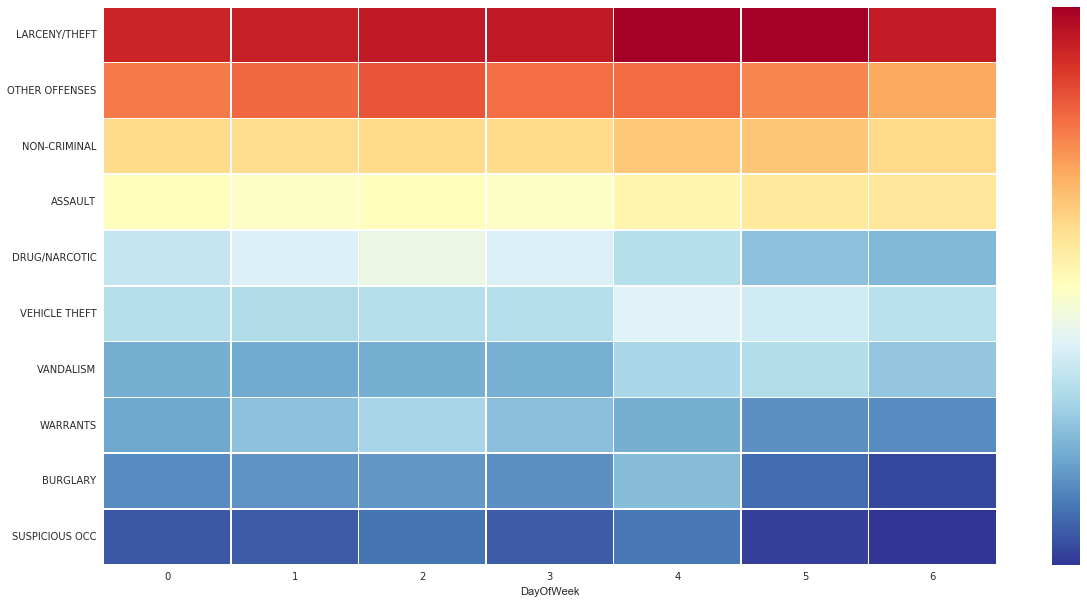

In [21]:
plt.figure(figsize=(20,10))
norm = colors.LogNorm(vmin=filtered.min(), vmax=filtered.max())
sns.heatmap(filtered, linewidths=.5,cmap=cm.RdYlBu_r,norm=norm)
plt.show()

In [3]:
%load_ext version_information
%version_information numpy,pandas,matplotlib,seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.10.4
pandas 0.18.1
matplotlib 1.5.1
seaborn 0.7.0
Tue May 31 02:33:55 2016 BST